In [108]:
import pandas as pd
import numpy as np

In [109]:
train_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_train_2_group.csv')

In [110]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str)

In [111]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target','variable'], axis=1)

In [112]:
numerical_feats = train_1.dtypes[train_1.dtypes == "float64"].index.tolist()
numerical_feats.remove('target_1')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_1.dtypes[train_1.dtypes != "float64"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  69
Number of Categorical features:  18


In [113]:
numerical_feats

['LOCTN_ALTT',
 'LOCTN_GRDN',
 'EIGHT_AGL',
 '2day_mean_T3H',
 '2day_max_T3H',
 '2day_min_T3H',
 '1day_mean_T3H',
 '1day_max_T3H',
 '1day_min_T3H',
 'day_mean_T3H',
 'day_max_T3H',
 'day_min_T3H',
 '2day_mean_REH',
 '2day_max_REH',
 '2day_min_REH',
 '1day_mean_REH',
 '1day_max_REH',
 '1day_min_REH',
 'day_mean_REH',
 'day_max_REH',
 'day_min_REH',
 '2day_mean_WSD',
 '2day_max_WSD',
 '2day_min_WSD',
 '1day_mean_WSD',
 '1day_max_WSD',
 '1day_min_WSD',
 'day_mean_WSD',
 'day_max_WSD',
 'day_min_WSD',
 '2day_mean_VEC',
 '2day_max_VEC',
 '2day_min_VEC',
 '1day_mean_VEC',
 '1day_max_VEC',
 '1day_min_VEC',
 'day_mean_VEC',
 'day_max_VEC',
 'day_min_VEC',
 '2day_mean_POP',
 '2day_max_POP',
 '2day_min_POP',
 '1day_mean_POP',
 '1day_max_POP',
 '1day_min_POP',
 'day_mean_POP',
 'day_max_POP',
 'day_min_POP',
 '2day_mean_WAV',
 '2day_max_WAV',
 '2day_min_WAV',
 '1day_mean_WAV',
 '1day_max_WAV',
 '1day_min_WAV',
 'day_mean_WAV',
 'day_max_WAV',
 'day_min_WAV',
 '2day_mode_PTY',
 '1day_mode_PTY',
 '

In [114]:
categorical_feats

['STORUNST',
 'FROR_CD',
 'FRTP_CD',
 'KOFTR_GROU',
 'DMCLS_CD',
 'AGCLS_CD',
 'DNST_CD',
 'HEIGHT',
 'PRRCK_LARG',
 'PRRCK_MDDL',
 'CLZN_CD',
 'TPGRP_TPCD',
 'PRDN_FOM_C',
 'SLANT_TYP',
 'SLDPT_TPCD',
 'SCSTX_CD',
 'SLTP_CD',
 'TPTP']

In [115]:
train_1_array=np.array(train_1)

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 86]=le.fit_transform(train_1_array[:,86])
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [117]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [118]:
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder

In [119]:
encoder = OrdinalEncoder(categorical_feats)
train_1[categorical_feats] = encoder.fit_transform(train_1[categorical_feats], train_1['target_1'])

In [120]:
test_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_test_2_group.csv')

In [121]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [122]:
test_id_1=test_1[['index', 'date', 'umd']]

In [123]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)

In [124]:
test_1_array=np.array(test_1)

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 86]=le.fit_transform(test_1_array[:,86])
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [126]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [127]:
test_1[categorical_feats] = encoder.transform(test_1[categorical_feats])

In [128]:
scaler = StandardScaler()
train_1[numerical_feats] = scaler.fit_transform(train_1[numerical_feats])
test_1[numerical_feats] = scaler.transform(test_1[numerical_feats])

In [129]:
train_1['target_1']=train_1['target_1'].astype(int)

In [130]:
n_est = 2000
seed = 42
n_class = 2
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [132]:
# IsolationForest 모델 만들기
isol = IsolationForest(max_samples=100, random_state=200) 

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
isol.fit(X_features)
y_pred= isol.predict(X_features)

In [133]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [134]:
train_1=train_1.join(isola, how='inner')

In [135]:
train_1=train_1[train_1['isal']== 1]

In [136]:
train_1=train_1.drop(['isal'], axis=1)

In [30]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

<AxesSubplot:xlabel='target_1', ylabel='count'>

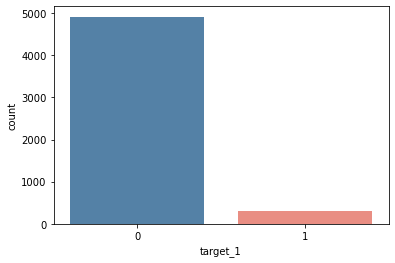

In [137]:
import seaborn as sns
colors=['steelblue','salmon']
sns.countplot(train_1['target_1'],palette=colors)

In [138]:
# shuffle1
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled1 = sklearn.utils.shuffle(X_features, random_state=2021)
y_shuffled1 =sklearn.utils.shuffle(y_label, random_state=2021)
X_train1, X_test1, y_train1, y_test1=train_test_split(x_shuffled1, y_shuffled1, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train1.shape, X_test1.shape)

(4335, 87) (1858, 87)


In [139]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train1, y_train1)

<AxesSubplot:xlabel='target_1', ylabel='count'>

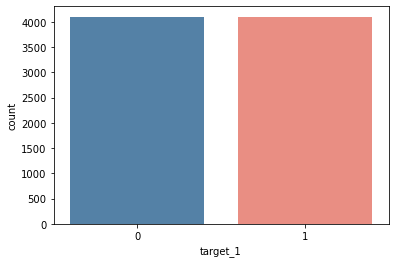

In [141]:
import seaborn as sns
colors=['steelblue','salmon']
sns.countplot(y_resampled1,palette=colors)

In [140]:
# shuffle2
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=2022)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=2022)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(4335, 87) (1858, 87)


In [34]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [35]:
# shuffle3
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=2023)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=2023)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(3651, 87) (1566, 87)


In [36]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [37]:
# shuffle4
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=2024)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=2024)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(3651, 87) (1566, 87)


In [38]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [39]:
# shuffle5
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=2025)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=2025)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(3651, 87) (1566, 87)


In [40]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [41]:
# shuffle6
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=2026)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=2026)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(3651, 87) (1566, 87)


In [42]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [43]:
# shuffle7
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled7 = sklearn.utils.shuffle(X_features, random_state=2027)
y_shuffled7 =sklearn.utils.shuffle(y_label, random_state=2027)
X_train7, X_test7, y_train7, y_test7=train_test_split(x_shuffled7, y_shuffled7, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train7.shape, X_test7.shape)

(3651, 87) (1566, 87)


In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled7, y_resampled7 = smote_nc.fit_resample(X_train7, y_train7)

In [45]:
# shuffle8
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled8 = sklearn.utils.shuffle(X_features, random_state=2028)
y_shuffled8 =sklearn.utils.shuffle(y_label, random_state=2028)
X_train8, X_test8, y_train8, y_test8=train_test_split(x_shuffled8, y_shuffled8, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train8.shape, X_test8.shape)

(3651, 87) (1566, 87)


In [46]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled8, y_resampled8 = smote_nc.fit_resample(X_train8, y_train8)

In [47]:
# shuffle9
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled9 = sklearn.utils.shuffle(X_features, random_state=2029)
y_shuffled9 =sklearn.utils.shuffle(y_label, random_state=2029)
X_train9, X_test9, y_train9, y_test9=train_test_split(x_shuffled9, y_shuffled9, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train9.shape, X_test9.shape)

(3651, 87) (1566, 87)


In [48]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled9, y_resampled9 = smote_nc.fit_resample(X_train9, y_train9)

In [49]:
# shuffle10
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled10 = sklearn.utils.shuffle(X_features, random_state=2030)
y_shuffled10 =sklearn.utils.shuffle(y_label, random_state=2030)
X_train10, X_test10, y_train10, y_test10=train_test_split(x_shuffled10, y_shuffled10, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train10.shape, X_test10.shape)

(3651, 87) (1566, 87)


In [50]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled10, y_resampled10 = smote_nc.fit_resample(X_train10, y_train10)

In [51]:
from catboost import CatBoostClassifier, Pool

In [52]:
train_data1 = Pool(data=X_resampled1, label=y_resampled1, cat_features=categorical_feats)
valid_data1 = Pool(data=X_test1, label=y_test1, cat_features=categorical_feats)

model_cat1 = CatBoostClassifier()
model_cat1.fit(train_data1, eval_set=valid_data1, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.05099
0:	learn: 0.6442114	test: 0.6407501	best: 0.6407501 (0)	total: 196ms	remaining: 3m 15s
100:	learn: 0.1047773	test: 0.1685170	best: 0.1685170 (100)	total: 5.34s	remaining: 47.6s
200:	learn: 0.0670986	test: 0.1477812	best: 0.1477812 (200)	total: 10.4s	remaining: 41.4s
300:	learn: 0.0498283	test: 0.1423200	best: 0.1423200 (300)	total: 15.3s	remaining: 35.4s
400:	learn: 0.0376093	test: 0.1404598	best: 0.1400699 (373)	total: 20.7s	remaining: 30.9s
500:	learn: 0.0302838	test: 0.1405509	best: 0.1399497 (463)	total: 26s	remaining: 25.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.139949703
bestIteration = 463

Shrink model to first 464 iterations.


In [53]:
train_data2 = Pool(data=X_resampled2, label=y_resampled2, cat_features=categorical_feats)
valid_data2 = Pool(data=X_test2, label=y_test2, cat_features=categorical_feats)

model_cat2 = CatBoostClassifier()
model_cat2.fit(train_data2, eval_set=valid_data2, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051037
0:	learn: 0.6495081	test: 0.6506399	best: 0.6506399 (0)	total: 32.9ms	remaining: 32.9s
100:	learn: 0.1031956	test: 0.1835003	best: 0.1835003 (100)	total: 5.59s	remaining: 49.8s
200:	learn: 0.0626644	test: 0.1603022	best: 0.1602802 (199)	total: 10.5s	remaining: 41.9s
300:	learn: 0.0449492	test: 0.1541014	best: 0.1539338 (295)	total: 15.5s	remaining: 36s
400:	learn: 0.0338057	test: 0.1511728	best: 0.1511728 (400)	total: 20.5s	remaining: 30.6s
500:	learn: 0.0260632	test: 0.1494694	best: 0.1492126 (494)	total: 25.4s	remaining: 25.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1492125663
bestIteration = 494

Shrink model to first 495 iterations.


In [54]:
train_data3 = Pool(data=X_resampled3, label=y_resampled3, cat_features=categorical_feats)
valid_data3 = Pool(data=X_test3, label=y_test3, cat_features=categorical_feats)

model_cat3 = CatBoostClassifier()
model_cat3.fit(train_data3, eval_set=valid_data3, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051023
0:	learn: 0.6488969	test: 0.6505617	best: 0.6505617 (0)	total: 41.9ms	remaining: 41.8s
100:	learn: 0.1063423	test: 0.1793302	best: 0.1793302 (100)	total: 5.05s	remaining: 45s
200:	learn: 0.0656018	test: 0.1537103	best: 0.1537103 (200)	total: 10s	remaining: 39.9s
300:	learn: 0.0480486	test: 0.1457545	best: 0.1457337 (296)	total: 15.1s	remaining: 35.1s
400:	learn: 0.0369645	test: 0.1435742	best: 0.1432676 (378)	total: 20.1s	remaining: 30.1s
500:	learn: 0.0295000	test: 0.1429853	best: 0.1428044 (496)	total: 25.2s	remaining: 25.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1428044153
bestIteration = 496

Shrink model to first 497 iterations.


In [55]:
train_data4 = Pool(data=X_resampled4, label=y_resampled4, cat_features=categorical_feats)
valid_data4 = Pool(data=X_test4, label=y_test4, cat_features=categorical_feats)

model_cat4 = CatBoostClassifier()
model_cat4.fit(train_data4, eval_set=valid_data4, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050993
0:	learn: 0.6505751	test: 0.6500438	best: 0.6500438 (0)	total: 41.6ms	remaining: 41.6s
100:	learn: 0.0995435	test: 0.1812652	best: 0.1812652 (100)	total: 5.78s	remaining: 51.4s
200:	learn: 0.0583774	test: 0.1632191	best: 0.1629697 (199)	total: 11.4s	remaining: 45.1s
300:	learn: 0.0406384	test: 0.1573057	best: 0.1572210 (299)	total: 16.7s	remaining: 38.7s
400:	learn: 0.0306086	test: 0.1551510	best: 0.1551510 (400)	total: 21.8s	remaining: 32.6s
500:	learn: 0.0235829	test: 0.1550210	best: 0.1543574 (414)	total: 27.2s	remaining: 27.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1543573918
bestIteration = 414

Shrink model to first 415 iterations.


In [56]:
train_data5 = Pool(data=X_resampled5, label=y_resampled5, cat_features=categorical_feats)
valid_data5 = Pool(data=X_test5, label=y_test5, cat_features=categorical_feats)

model_cat5 = CatBoostClassifier()
model_cat5.fit(train_data5, eval_set=valid_data5, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051015
0:	learn: 0.6515192	test: 0.6485254	best: 0.6485254 (0)	total: 34.9ms	remaining: 34.9s
100:	learn: 0.0984890	test: 0.1882230	best: 0.1882230 (100)	total: 6.13s	remaining: 54.5s
200:	learn: 0.0598483	test: 0.1674209	best: 0.1674131 (198)	total: 11.4s	remaining: 45.4s
300:	learn: 0.0422672	test: 0.1624597	best: 0.1619982 (278)	total: 16.7s	remaining: 38.7s
400:	learn: 0.0316409	test: 0.1603612	best: 0.1602732 (377)	total: 21.9s	remaining: 32.7s
500:	learn: 0.0247494	test: 0.1619433	best: 0.1599679 (417)	total: 27.2s	remaining: 27.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1599679441
bestIteration = 417

Shrink model to first 418 iterations.


In [57]:
train_data6 = Pool(data=X_resampled6, label=y_resampled6, cat_features=categorical_feats)
valid_data6 = Pool(data=X_test6, label=y_test6, cat_features=categorical_feats)

model_cat6 = CatBoostClassifier()
model_cat6.fit(train_data6, eval_set=valid_data6, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051037
0:	learn: 0.6578706	test: 0.6557917	best: 0.6557917 (0)	total: 38.9ms	remaining: 38.8s
100:	learn: 0.1142923	test: 0.1622347	best: 0.1622347 (100)	total: 5.78s	remaining: 51.4s
200:	learn: 0.0715492	test: 0.1341829	best: 0.1341829 (200)	total: 10.7s	remaining: 42.4s
300:	learn: 0.0527557	test: 0.1240670	best: 0.1240661 (299)	total: 16s	remaining: 37.2s
400:	learn: 0.0406951	test: 0.1211473	best: 0.1211059 (395)	total: 21.9s	remaining: 32.8s
500:	learn: 0.0322203	test: 0.1203211	best: 0.1201253 (496)	total: 27.3s	remaining: 27.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1201252865
bestIteration = 496

Shrink model to first 497 iterations.


In [58]:
train_data7 = Pool(data=X_resampled7, label=y_resampled7, cat_features=categorical_feats)
valid_data7 = Pool(data=X_test7, label=y_test7, cat_features=categorical_feats)

model_cat7 = CatBoostClassifier()
model_cat7.fit(train_data7, eval_set=valid_data7, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051048
0:	learn: 0.6560898	test: 0.6524071	best: 0.6524071 (0)	total: 43.4ms	remaining: 43.3s
100:	learn: 0.1047445	test: 0.1684979	best: 0.1684979 (100)	total: 5.8s	remaining: 51.6s
200:	learn: 0.0592181	test: 0.1452542	best: 0.1452542 (200)	total: 11s	remaining: 43.8s
300:	learn: 0.0437869	test: 0.1421045	best: 0.1421045 (300)	total: 16.5s	remaining: 38.4s
400:	learn: 0.0335901	test: 0.1398732	best: 0.1396776 (383)	total: 22.2s	remaining: 33.1s
500:	learn: 0.0271390	test: 0.1397819	best: 0.1394219 (480)	total: 27.9s	remaining: 27.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1394218622
bestIteration = 480

Shrink model to first 481 iterations.


In [59]:
train_data8 = Pool(data=X_resampled8, label=y_resampled8, cat_features=categorical_feats)
valid_data8 = Pool(data=X_test8, label=y_test8, cat_features=categorical_feats)

model_cat8 = CatBoostClassifier()
model_cat8.fit(train_data8, eval_set=valid_data8, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.05099
0:	learn: 0.6536991	test: 0.6532053	best: 0.6532053 (0)	total: 43.1ms	remaining: 43.1s
100:	learn: 0.1127311	test: 0.1643724	best: 0.1643724 (100)	total: 5.77s	remaining: 51.4s
200:	learn: 0.0707054	test: 0.1371846	best: 0.1371846 (200)	total: 10.8s	remaining: 43s
300:	learn: 0.0515257	test: 0.1293982	best: 0.1293982 (300)	total: 16.4s	remaining: 38s
400:	learn: 0.0403527	test: 0.1269414	best: 0.1269292 (393)	total: 21.7s	remaining: 32.4s
500:	learn: 0.0315983	test: 0.1250096	best: 0.1249255 (495)	total: 26.7s	remaining: 26.6s
600:	learn: 0.0263960	test: 0.1248534	best: 0.1245265 (556)	total: 31.9s	remaining: 21.2s
700:	learn: 0.0222294	test: 0.1249785	best: 0.1242673 (620)	total: 37.3s	remaining: 15.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1242673079
bestIteration = 620

Shrink model to first 621 iterations.


In [60]:
train_data9 = Pool(data=X_resampled9, label=y_resampled9, cat_features=categorical_feats)
valid_data9 = Pool(data=X_test9, label=y_test9, cat_features=categorical_feats)

model_cat9 = CatBoostClassifier()
model_cat9.fit(train_data9, eval_set=valid_data9, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050993
0:	learn: 0.6464058	test: 0.6462516	best: 0.6462516 (0)	total: 64ms	remaining: 1m 3s
100:	learn: 0.1039416	test: 0.1801528	best: 0.1801528 (100)	total: 5.96s	remaining: 53.1s
200:	learn: 0.0688378	test: 0.1593997	best: 0.1590909 (192)	total: 11.5s	remaining: 45.6s
300:	learn: 0.0492503	test: 0.1510908	best: 0.1509605 (298)	total: 17.3s	remaining: 40.2s
400:	learn: 0.0378290	test: 0.1469834	best: 0.1464263 (384)	total: 23.1s	remaining: 34.6s
500:	learn: 0.0295938	test: 0.1455128	best: 0.1450424 (491)	total: 28.3s	remaining: 28.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1450423827
bestIteration = 491

Shrink model to first 492 iterations.


In [61]:
train_data10 = Pool(data=X_resampled10, label=y_resampled10, cat_features=categorical_feats)
valid_data10 = Pool(data=X_test10, label=y_test10, cat_features=categorical_feats)

model_cat10 = CatBoostClassifier()
model_cat10.fit(train_data10, eval_set=valid_data10, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.051004
0:	learn: 0.6552267	test: 0.6565760	best: 0.6565760 (0)	total: 34.2ms	remaining: 34.2s
100:	learn: 0.1079922	test: 0.1690827	best: 0.1690827 (100)	total: 5.65s	remaining: 50.3s
200:	learn: 0.0656615	test: 0.1414954	best: 0.1414954 (200)	total: 11s	remaining: 43.8s
300:	learn: 0.0452048	test: 0.1317682	best: 0.1317682 (300)	total: 16.2s	remaining: 37.7s
400:	learn: 0.0351773	test: 0.1279587	best: 0.1279504 (392)	total: 21.3s	remaining: 31.8s
500:	learn: 0.0277253	test: 0.1249015	best: 0.1247893 (498)	total: 26.3s	remaining: 26.2s
600:	learn: 0.0232759	test: 0.1244942	best: 0.1242688 (592)	total: 31.3s	remaining: 20.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1242687953
bestIteration = 592

Shrink model to first 593 iterations.


In [62]:
cat_pred_test1 = model_cat1.predict_proba(data=test_1)[:,1]

In [63]:
cat_pred_test2 = model_cat2.predict_proba(data=test_1)[:,1]

In [64]:
cat_pred_test3 = model_cat3.predict_proba(data=test_1)[:,1]

In [65]:
cat_pred_test4 = model_cat4.predict_proba(data=test_1)[:,1]

In [66]:
cat_pred_test5 = model_cat5.predict_proba(data=test_1)[:,1]

In [67]:
cat_pred_test6 = model_cat6.predict_proba(data=test_1)[:,1]

In [68]:
cat_pred_test7 = model_cat7.predict_proba(data=test_1)[:,1]

In [69]:
cat_pred_test8 = model_cat8.predict_proba(data=test_1)[:,1]

In [70]:
cat_pred_test9 = model_cat9.predict_proba(data=test_1)[:,1]

In [71]:
cat_pred_test10 = model_cat10.predict_proba(data=test_1)[:,1]

In [72]:
preds1 = [ 1 if x > 0.5 else 0 for x in cat_pred_test1 ]

In [73]:
preds2 = [ 1 if x > 0.5 else 0 for x in cat_pred_test2 ]

In [74]:
preds3 = [ 1 if x > 0.5 else 0 for x in cat_pred_test3 ]

In [75]:
preds4 = [ 1 if x > 0.5 else 0 for x in cat_pred_test4 ]

In [76]:
preds5 = [ 1 if x > 0.5 else 0 for x in cat_pred_test5 ]

In [77]:
preds6 = [ 1 if x > 0.5 else 0 for x in cat_pred_test6 ]

In [78]:
preds7 = [ 1 if x > 0.5 else 0 for x in cat_pred_test7 ]

In [79]:
preds8 = [ 1 if x > 0.5 else 0 for x in cat_pred_test8 ]

In [80]:
preds9 = [ 1 if x > 0.5 else 0 for x in cat_pred_test9 ]

In [81]:
preds10 = [ 1 if x > 0.5 else 0 for x in cat_pred_test10 ]

In [82]:
cat_pred1=pd.DataFrame(preds1, columns= ['col1'])

In [83]:
cat_pred2=pd.DataFrame(preds2, columns= ['col2'])

In [84]:
cat_pred3=pd.DataFrame(preds3, columns= ['col3'])

In [85]:
cat_pred4=pd.DataFrame(preds4, columns= ['col4'])

In [86]:
cat_pred5=pd.DataFrame(preds5, columns= ['col5'])

In [87]:
cat_pred6=pd.DataFrame(preds6, columns= ['col6'])

In [88]:
cat_pred7=pd.DataFrame(preds7, columns= ['col7'])

In [89]:
cat_pred8=pd.DataFrame(preds8, columns= ['col8'])

In [90]:
cat_pred9=pd.DataFrame(preds9, columns= ['col9'])

In [91]:
cat_pred10=pd.DataFrame(preds10, columns= ['col10'])

In [92]:
cat_pred1['col1'].value_counts()

0    3323
1      87
Name: col1, dtype: int64

In [93]:
cat_pred2['col2'].value_counts()

0    3334
1      76
Name: col2, dtype: int64

In [94]:
cat_pred3['col3'].value_counts()

0    3283
1     127
Name: col3, dtype: int64

In [95]:
cat_pred4['col4'].value_counts()

0    3286
1     124
Name: col4, dtype: int64

In [96]:
cat_pred5['col5'].value_counts()

0    3288
1     122
Name: col5, dtype: int64

In [97]:
cat_pred6['col6'].value_counts()

0    3282
1     128
Name: col6, dtype: int64

In [98]:
cat_pred7['col7'].value_counts()

0    3345
1      65
Name: col7, dtype: int64

In [99]:
cat_pred8['col8'].value_counts()

0    3287
1     123
Name: col8, dtype: int64

In [100]:
cat_pred9['col9'].value_counts()

0    3254
1     156
Name: col9, dtype: int64

In [101]:
cat_pred10['col10'].value_counts()

0    3295
1     115
Name: col10, dtype: int64

In [102]:
cat_pred=cat_pred1.join(cat_pred2, how= 'inner')
cat_pred=cat_pred.join(cat_pred3, how= 'inner')
cat_pred=cat_pred.join(cat_pred4, how= 'inner')
cat_pred=cat_pred.join(cat_pred5, how= 'inner')
cat_pred=cat_pred.join(cat_pred6, how= 'inner')
cat_pred=cat_pred.join(cat_pred7, how= 'inner')
cat_pred=cat_pred.join(cat_pred8, how= 'inner')
cat_pred=cat_pred.join(cat_pred9, how= 'inner')
cat_pred=cat_pred.join(cat_pred10, how= 'inner')
cat_pred['sum']=cat_pred['col1']+cat_pred['col2']+cat_pred['col3']+cat_pred['col4']+cat_pred['col5']+cat_pred['col6']+cat_pred['col7']+cat_pred['col8']+cat_pred['col9']+cat_pred['col10']

In [103]:
cat_pred['1day_yn'] = np.where((cat_pred['sum']>=1), 1,0)

In [104]:
cat_pred['1day_yn'].value_counts()

0    3161
1     249
Name: 1day_yn, dtype: int64

In [105]:
cat_1=test_id_1.join(cat_pred, how= 'inner')

In [106]:
cat_1

,index,date,umd,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,sum,1day_yn
0,0,20200610,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20200611,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
2,2,20200612,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
3,3,20200610,곤양면,0,0,0,0,0,0,0,0,0,0,0,0
4,4,20200611,곤양면,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3405,20200906,환여동,0,0,0,0,0,0,0,0,0,0,0,0
3406,3406,20200903,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0
3407,3407,20200904,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0
3408,3408,20200905,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
cat_1.to_csv('cat_2sub2_5.csv', index=False, encoding='CP949')